In [4]:
from autodistill_grounded_sam_2 import GroundedSAM2
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import cv2
import os 
from os import listdir
from os.path import join
from PIL import Image 
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt
import supervision as sv

In [6]:
video_root = "/home/george/data/gijs/videos"
image_root = "/home/george/data/gijs/images"

In [7]:
base_model = GroundedSAM2(
    ontology=CaptionOntology(
        {
            "beetle": "beetle",
            "leaf": "leaf",
            "insect": "insect",
            "soil": "soil",
            "box": "box",
            "plastic": "plastic",
            "weed": "weed",
            "branch": "branch",
            "twig": "twig",
            "herb": "herb",
            "wall": "wall",
        }
    )
)

['/home/george/data/gijs/videos/Pterostichus(kootje)_20251101.mp4', '/home/george/data/gijs/videos/Pterostichus_20250107_1.mp4', '/home/george/data/gijs/videos/Pterostichus_20250107_2.mp4']


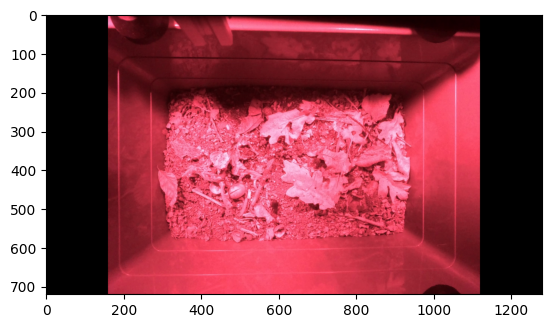

In [8]:
video_filenames = os.listdir(video_root)
video_paths = [join(video_root, f) for f in video_filenames]
print(video_paths)

# Get one frame
cap = cv2.VideoCapture(video_paths[0])
ret, frame = cap.read()
plt.imshow(frame)

In [9]:
results = base_model.predict(frame)

In [10]:
output=plot(
    image=frame,
    classes=base_model.ontology.classes(),
    detections=results,
    raw=True
)

Iterate over the video

In [13]:
def video_generator(path):
    """Iterate over a cv2.VideoCapture and gracefully stop when finised.
    """
    cap = cv2.VideoCapture(path)
    ret, frame = cap.read()
    yield frame
    while(1):
        ret, frame = cap.read()
        if cv2.waitKey(1) & 0xFF == ord('q') or ret==False :
            cap.release()
            cv2.destroyAllWindows()
            break
        yield frame 

In [14]:
# output dir
output_dir = join(image_root, video_filenames[0]+".sam2")
os.makedirs(output_dir, exist_ok=True)

for i, frame in enumerate(video_generator(video_paths[0])):
    results = base_model.predict(frame)
    output=plot(
        image=frame,
        classes=base_model.ontology.classes(),
        detections=results,
        raw=True
    )
    output_path = join(output_dir, f"{i}.jpg")
    cv2.imwrite(output_path, output)